In [1]:
import numpy as np
import dicom
import os
import sys
from os.path import join

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from niwidgets import NiftiWidget

Read in the nifti file that you want to view

In [3]:
thisBrain = NiftiWidget('../s1923.nii.gz')
thisBrain.nifti_plotter(colormap='bone')


interactive(children=(IntSlider(value=127, description='x', max=255), IntSlider(value=127, description='y', max=255), IntSlider(value=80, description='z', max=161), Output()), _dom_classes=('widget-interact',))

### Reading from RAW dicom
Load in a reference slice to play with the different transformations on

In [5]:
testSlice = dicom.read_file('../../../sandbox/rawScannerData/GE/s1923/i2861496.MRDC.71')

In [6]:
pixels = testSlice.pixel_array

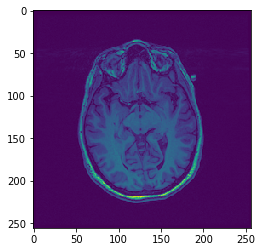

In [7]:
pixels.shape
plt.imshow(pixels)

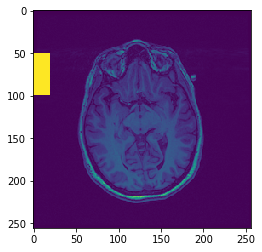

In [8]:
pixels[50:100, 0:20] = 10000
plt.imshow(pixels)

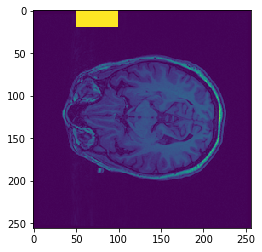

In [9]:
pixelsT = pixels.T
plt.imshow(pixelsT)

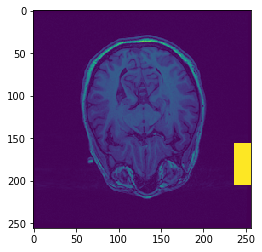

In [10]:
# rotate 180 degrees, then flip L/R
new_pixels = np.rot90(pixels, k=2)
#new_pixels = np.fliplr(new_pixels)

plt.imshow(new_pixels)

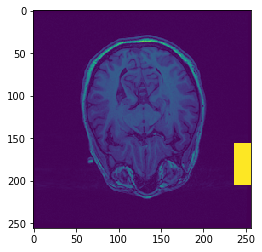

In [11]:
flipped_pixels = np.fliplr(pixels)
flipped_pixels = np.flipud(flipped_pixels)

plt.imshow(flipped_pixels)

In [23]:
print(testSlice.dir())

['AccessionNumber', 'AcquisitionDate', 'AcquisitionMatrix', 'AcquisitionNumber', 'AcquisitionTime', 'AdditionalPatientHistory', 'AngioFlag', 'BitsAllocated', 'BitsStored', 'CardiacNumberOfImages', 'Columns', 'ContentDate', 'ContentTime', 'DeviceSerialNumber', 'EchoNumbers', 'EchoTime', 'EchoTrainLength', 'FlipAngle', 'FrameOfReferenceUID', 'HeartRate', 'HighBit', 'ImageOrientationPatient', 'ImagePositionPatient', 'ImageType', 'ImagedNucleus', 'ImagesInAcquisition', 'ImagingFrequency', 'InPlanePhaseEncodingDirection', 'InStackPositionNumber', 'InstanceNumber', 'InstitutionName', 'InversionTime', 'LargestImagePixelValue', 'Laterality', 'MRAcquisitionType', 'MagneticFieldStrength', 'Manufacturer', 'ManufacturerModelName', 'Modality', 'NumberOfAverages', 'PatientAge', 'PatientBirthDate', 'PatientID', 'PatientName', 'PatientPosition', 'PatientSex', 'PatientWeight', 'PercentPhaseFieldOfView', 'PercentSampling', 'PerformedLocation', 'PerformedProcedureStepDescription', 'PerformedStationName',

In [26]:
getattr(testSlice, 'PixelSpacing')

['1', '1']

In [27]:
np.diag([4,5,6])

array([[4, 0, 0],
       [0, 5, 0],
       [0, 0, 6]])

### Read in from full NIFTI image

In [12]:
import nibabel as nb

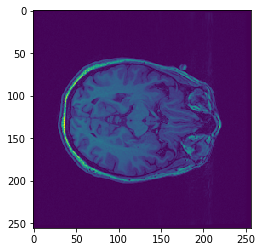

In [50]:
n = nb.load('../anat_s1923.nii.gz')
imgData = n.get_data()
slice70 = imgData[:,:,69]

plt.imshow(slice70)

In [51]:
hdr = n.header
print(hdr)

<class 'nibabel.nifti2.Nifti2Header'> object, endian='<'
sizeof_hdr      : 540
magic           : b'n+2'
eol_check       : [13 10 26 10]
datatype        : int16
bitpix          : 16
dim             : [  3 256 256 162   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
pixdim          : [ 1.  1.  1.  1.  1.  1.  1.  1.]
vox_offset      : 0
scl_slope       : nan
scl_inter       : nan
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
slice_start     : 0
slice_end       : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z       : 0.0
srow_x          : [ 1.  0.  0.  0.]
srow_y          : [ 0.  1.  0.  0.]
srow_z          : [ 0.  0.  1.  0.]
slice_code      : unknown
xyzt_units      : 0
intent_code     : none
intent_name     : b''
dim_info        : 0
unused_str

In [53]:
hdr.set_xyzt_units(xyz='mm', t='sec')

In [54]:
print(hdr)

<class 'nibabel.nifti2.Nifti2Header'> object, endian='<'
sizeof_hdr      : 540
magic           : b'n+2'
eol_check       : [13 10 26 10]
datatype        : int16
bitpix          : 16
dim             : [  3 256 256 162   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
pixdim          : [ 1.  1.  1.  1.  1.  1.  1.  1.]
vox_offset      : 0
scl_slope       : nan
scl_inter       : nan
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
slice_start     : 0
slice_end       : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z       : 0.0
srow_x          : [ 1.  0.  0.  0.]
srow_y          : [ 0.  1.  0.  0.]
srow_z          : [ 0.  0.  1.  0.]
slice_code      : unknown
xyzt_units      : 10
intent_code     : none
intent_name     : b''
dim_info        : 0
unused_st

In [52]:
hdr.get_xyzt_units()

('unknown', 'unknown')